### 데이터 처리하기

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import missingno as msno

# 한글 글꼴 설정
mpl.rc('font', family = 'Malgun Gothic')

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("05_Data.csv", encoding = 'cp949')
data.head(10)

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1
5,5,2019-05-16,V2_16,8.801047e+12,발주가능,0,주방세제,4
6,6,2019-05-16,V2_17,8.801046e+12,발주가능,0,헤어케어,11
7,7,2019-05-16,V2_18,8.801046e+12,발주가능,120,헤어케어,15
8,8,2019-05-16,V2_20,8.801046e+12,발주가능,0,주방세제,0
9,9,2019-05-16,V2_22,8.801047e+12,발주가능,0,세탁세제,0


#### 1. 데이터의 구조와 타입 확인

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15000 non-null  int64  
 1   날짜          15000 non-null  object 
 2   상품명         15000 non-null  object 
 3   바코드         14992 non-null  float64
 4   발주가능상태      15000 non-null  object 
 5   입고수량        15000 non-null  int64  
 6   카테고리        15000 non-null  object 
 7   출고수량        15000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 937.6+ KB


#### 2. 데이터 요약 (통계량)

In [4]:
data.describe()

,Unnamed: 0,바코드,입고수량,출고수량
count,15000.000000,1.499200e+04,15000.000000,15000.000000
mean,7499.500000,1.294839e+13,58.144533,7.205200
std,4330.271354,5.243929e+12,348.398250,19.819656
min,0.000000,6.414100e+12,0.000000,0.000000
25%,3749.750000,8.801046e+12,0.000000,0.000000
50%,7499.500000,8.801047e+12,0.000000,1.000000
75%,11249.250000,1.880105e+13,0.000000,4.000000
max,14999.000000,2.880105e+13,9777.000000,308.000000


#### 3. 날짜 데이터 항목을 날짜 타입으로 변경하여 datetime이름의 변수로 선언

In [8]:
data['datetime'] = pd.to_datetime(data['날짜'])
data

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,datetime
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16
...,...,...,...,...,...,...,...,...,...
14995,14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3,2019-08-07
14996,14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7,2019-08-07
14997,14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16,2019-08-07
14998,14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6,2019-08-07


#### 4. datetime 변수로부터 연도/월/요일 항목을 추출해서 변수로 선언

In [25]:
data['연도'] = data['datetime'].dt.year
data['월'] = data['datetime'].dt.month
data['요일'] = data['datetime'].dt.dayofweek
weekday_list = ['월', '화', '수', '목', '금', '토', '일']
data['요일'] = data.apply(lambda x : weekday_list[x['요일']], axis = 1)
data

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,datetime,연도,월,요일
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,목
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,목
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16,2019,5,목
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16,2019,5,목
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16,2019,5,목
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3,2019-08-07,2019,8,수
14996,14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7,2019-08-07,2019,8,수
14997,14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16,2019-08-07,2019,8,수
14998,14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6,2019-08-07,2019,8,수


In [87]:
# data['요일'] = data['datetime'].dt.day_name()
# data

#### 5. 카테고리 항목 중 세탁세제의 출고수량이 높은 100개 데이터 추출 후 result1.xlsx로 저장

In [20]:
data[data['카테고리'] == '세탁세제'].sort_values(ascending = False, by = '출고수량').head(100).to_excel('result1.xlsx')

#### 6. 카테고리별 출고수량과 입고수량의 평균/합/표준편차 요약하기

In [22]:
pd.pivot_table(index = '카테고리', columns = ['출고수량', '입고수량'], aggfunc = ['mean', 'sum', 'std'], data = data).reset_index()

카테고리         mean                                                      \
              Unnamed: 0                                                       
출고수량                   0                                                       
입고수량                   0        1             2         3        4         6   
0       F&B  6364.868159      NaN           NaN       NaN      NaN       NaN   
1        ST  6382.581845      NaN    757.000000    551.00      NaN   6259.50   
2        기타  7930.620690      NaN           NaN       NaN      NaN       NaN   
3      덴탈케어  6467.955459      NaN   5493.000000       NaN      NaN   3802.00   
4     매입브랜드  6691.888889      NaN           NaN       NaN      NaN   9455.00   
5      세탁세제  6904.500000   3486.2   4957.636364  10334.75   8915.5   3386.75   
6      주방세제  6147.840067   8134.0   4298.000000   2500.00    974.0   9394.00   
7      헤어케어  6553.869663  12090.0  12503.000000       NaN  14731.0  13255.00   

                                              ...  std                     \
                                              ...  바코드                      
출고수량                                          ...   98            99  109   
입고수량            7            8             9  ...    0             0    0   
0             NaN  8505.500000           NaN  ...  NaN           NaN  NaN   
1     9402.333333          NaN           NaN  ...  NaN           NaN  NaN   
2             NaN          NaN           NaN  ...  NaN           NaN  NaN   
3      525.000000  8610.625000   9201.000000  ...  NaN           NaN  NaN   
4             NaN          NaN   2668.000000  ...  NaN           NaN  NaN   
5             NaN  7775.285714   4481.500000  ...  NaN  5.773502e+12  0.0   
6             NaN          NaN   7997.333333  ...  NaN           NaN  NaN   
7             NaN  6757.588235  12125.000000  ...  0.0           NaN  NaN   

                                                                              
                                                                              
출고수량  116           120           121            122  155  167           179  
입고수량    0             0             0              0    0    0             0  
0     NaN           NaN           NaN            NaN  NaN  NaN           NaN  
1     NaN           NaN           NaN            NaN  NaN  NaN           NaN  
2     NaN           NaN           NaN            NaN  NaN  NaN           NaN  
3     NaN           NaN           NaN            NaN  NaN  NaN           NaN  
4     NaN           NaN           NaN            NaN  NaN  NaN           NaN  
5     NaN  7.071068e+12  24970.399424            NaN  0.0  0.0  30570.347471  
6     NaN           NaN           NaN  413625.280135  NaN  NaN           NaN  
7     0.0           NaN           NaN            NaN  NaN  NaN           NaN  

[8 rows x 7617 columns]

#### 7. 입고수량 항목의 분포 시각화, 정규분포 가설검정 수행

C:\Users\Conet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='입고수량', ylabel='Density'>

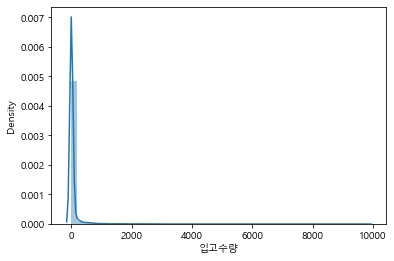

In [27]:
sns.distplot(data['입고수량'])

In [28]:
stats.normaltest(data['입고수량'])

NormaltestResult(statistic=27348.379111004586, pvalue=0.0)

#### 8. 출고수량이 상위 25%인 데이터를 'A', 미만인 데이터를 'B'로 바꿔서 구분이라는 이름의 새로운 항목으로 선언

In [30]:
data['출고수량'].describe()  # 25%는 0
data['구분'] = data[data['출고수량'] >= 0]
data[data['출고수량'] < 0]

count    15000.000000
mean         7.205200
std         19.819656
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        308.000000
Name: 출고수량, dtype: float64

In [34]:
dis = []
for row in data['출고수량']:
    if row >= 0:
        dis.append('A')
    else:
        dis.append('B')
data['구분'] = dis

In [88]:
data['출고수량'].quantile(0.75)  # 특정 백분위수에 위치한 값 확인

def function1(row):
    if row >= data['출고수량'].quantile(0.75):
        return 'A'
    else:
        return 'B'

data['구분'] = data['출고수량'].apply(function1)
data['구분'].value_counts()

B    10907
A     4093
Name: 구분, dtype: int64

In [35]:
data.head()

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,datetime,연도,월,요일,구분
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,목,A
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,목,A
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16,2019,5,목,A
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16,2019,5,목,A
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16,2019,5,목,A


In [51]:
data['카테고리'].unique()

array(['세탁세제', '헤어케어', '주방세제', 'ST', 'F&B', '덴탈케어', '기타', '매입브랜드'],
      dtype=object)

#### 9. 카테고리에서 세탁세제와 헤어케어제품의 입고수량  평균의 차이가 있는지 확인
- 세탁세제와 헤어케어 제품을 뽑아서 입고수량의 평균 barchart로 시각화
- 두 집단 간 평균 차이가 있는지 가설 검정 수행

In [54]:
dd = data.groupby(by = '카테고리')[['입고수량']].mean().reset_index()
dd

,카테고리,입고수량
0,F&B,48.363198
1,ST,5.566397
2,기타,34.163399
3,덴탈케어,67.688283
4,매입브랜드,16.638655
5,세탁세제,60.092145
6,주방세제,104.768286
7,헤어케어,57.072000


In [60]:
dd_1 = dd[dd['카테고리'].isin(['세탁세제', '헤어케어'])]
dd_1

,카테고리,입고수량
5,세탁세제,60.092145
7,헤어케어,57.072000


<BarContainer object of 2 artists>

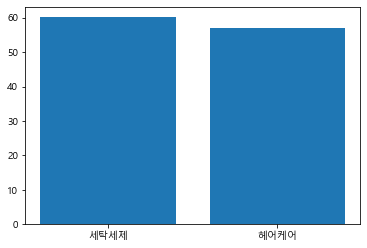

In [61]:
plt.bar(dd_1['카테고리'], dd_1['입고수량'])

<AxesSubplot:xlabel='카테고리', ylabel='입고수량'>

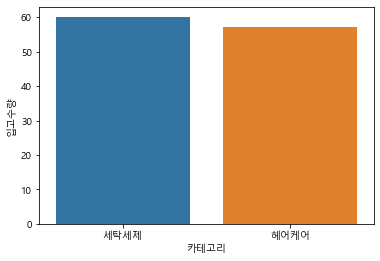

In [89]:
sns.barplot(data=dd_1, x='카테고리', y='입고수량')

<AxesSubplot:xlabel='카테고리', ylabel='입고수량'>

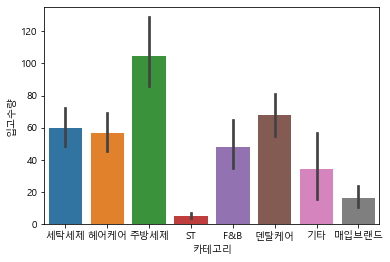

In [90]:
sns.barplot(data=data, x='카테고리', y='입고수량')

In [67]:
stats.ranksums(dd_1[dd_1['카테고리']=='세탁세제']['입고수량'], dd_1[dd_1['카테고리']=='헤어케어']['입고수량'])

RanksumsResult(statistic=1.0, pvalue=0.31731050786291415)

In [92]:
cond1 = data['카테고리']=='세탁세제'
cond2 = data['카테고리']=='헤어케어'
dd_11= data.loc[cond1]
dd_12 = data.loc[cond2]

stats.ranksums(dd_11['입고수량'], dd_12['입고수량'])

RanksumsResult(statistic=1.0908051269344679, pvalue=0.27535864003025057)

#### 10. 5월 대비 6월에 출고수량의 증감율을 각 카테고리별로 계산

In [84]:
#data['pct_change_by_mth'] = data.sort_values(['월']).groupby(['출고수량']).data.pct_change(periods = 12)
data1 = data.pivot_table(index = '카테고리', columns = ['월'], values = '출고수량', aggfunc = 'sum').reset_index()
#print(data1)
data1['증감율'] = (data1[6] - data1[5]) / data1[5]
data1

월,카테고리,5,6,7,8,증감율
0,F&B,1248,2021,2193,316,0.619391
1,ST,95,240,300,56,1.526316
2,기타,144,221,206,50,0.534722
3,덴탈케어,2788,5806,6112,1094,1.082496
4,매입브랜드,69,115,80,16,0.666667
5,세탁세제,8579,16732,17938,4021,0.950344
6,주방세제,2872,6647,7270,1271,1.314415
7,헤어케어,3632,7615,6485,1846,1.096641
